# Сборный проект 1. Анализ рынка продаж компьютерных игр

**Описание проекта:** 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План проекта:**

Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv.

Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data_games = pd.read_csv('/datasets/games.csv')
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод:

    - Видно, что есть пропущенные значения в столбцах
    
    - Присутствуют неккоректные типы данных
    
    - Название столбцов с заглавных букв и неоднородны.

## Предобработка данных

### Замените названия столбцов (приведите к нижнему регистру);

In [5]:
data_games.columns = data_games.columns.str.lower()
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработаем пропуски

In [6]:
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data_games[data_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
data_games[data_games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Преобразуем столбцы user_score и year_of_realease к типам float и int, соответственно:

    - year_of_release с float на int - для удобства чтения и анализа
    
    - user_score на float, так  как столбец по описанию должен содержать
    оценку пользователей.
    
Обработаем пропуски в толбцах name, genre, year_of_release, удалив их,
так как заполнить их не представляется возможным
    
С пропусками в столбцах с оценками ничего сделать не можем, так как это может сильно исказить результаты корреляционного анализа и стат-тестов(Мы обнаружили аббревиатуру 'tbd', что означает рейтинг не определен. Можно просто заменить на nan). 

В столбце rating попуски заполнили значением  unknown, так как это категоральная переменная


Про пропуски в стобцах:

year_of_release: Пропуск в данном столбце мог возникнуть из-за того,
что при заполнении данных об игре забыли указать год или точная дата выхода игры точно не определена.

name: Возможно пропуски связаны с тем что его просто не заполнили или у игры на тот момент не было названия

genre: Думаю, что приччины возникновения пропусков в этом столбце идентичны пропускам с толбце  name.

rating, user_score, critic_score: Может быть, причиной такого большого количества пропусков в столбцах с оценками экспертов и пользователями, и рейтингами является отсутствие данных или ошибки при вводе информации. Более вероятно, что не все видеоигры имеют оценки или рейтинги, так как это может зависеть от региона, в котором игра выпущена, и от политики разработчиков. Возможно, некоторые игры получают рейтинги от других организаций, отличных от ESRB, некоторые игры могут быть недоступны в тех или иных регионах, что также может привести к пропускам в данных 

In [9]:
data_games = data_games.dropna(subset=['year_of_release'])
data_games = data_games.dropna(subset=['name'])
data_games = data_games.dropna(subset=['genre'])
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = np.nan
data_games['rating'] = data_games['rating'].fillna('unknown')

In [10]:
data_games.duplicated().sum()

0

Отлично, явных дубликатов нет

In [82]:
duplicates = data_games.duplicated(subset=['name', 'platform'])
print(data_games[duplicates])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, all_region_sales]
Index: []


Удалим неявные дубликаты, чтобы избежать искажения результатов анализа. Дубликаты могут привести к неправильным выводам и ошибочным статистическим показателям. Удаление дубликатов помогает очистить данные и сделать анализ более точным и корректным.

In [83]:
data_games.drop_duplicates(subset=['name', 'platform'], inplace=True)

In [13]:
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [14]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')
data_games['user_score'] = data_games['user_score'].astype('float')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [15]:
data_games['all_region_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales']\
          + data_games['other_sales']

In [16]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Вывод:

    - Изменили названия столбцов, приведя их к нижнему регистру
    - Преобразовали столбцы user_score и year_of_realease к типам float и int, соответственно,
    year_of_release с float на int - для удобства чтения и анализа, а user_score на float, так 
    как столбец по описанию должен содержать оценку пользователей.
    - Обработали пропуски в толбцах name, genre, year_of_release, удалив их, так как заполнить их не представляется
    возможным
    - С пропусками в столбцах с оценками ничего сделать не можем, так как это может сильно исказить результаты
    корреляционного  анализа и стат-тестов, рейтинг заполнили значением  unknown, так как это категоральная переменная, 
    также в столбце user_score все значения  tdb заменили на  NaN
    - также добавили столбец all_region_sales с суммой продаж во всех регионах
    - нашли неявные дубликаты и удалили их, явных же дубликатов не обнаружено

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

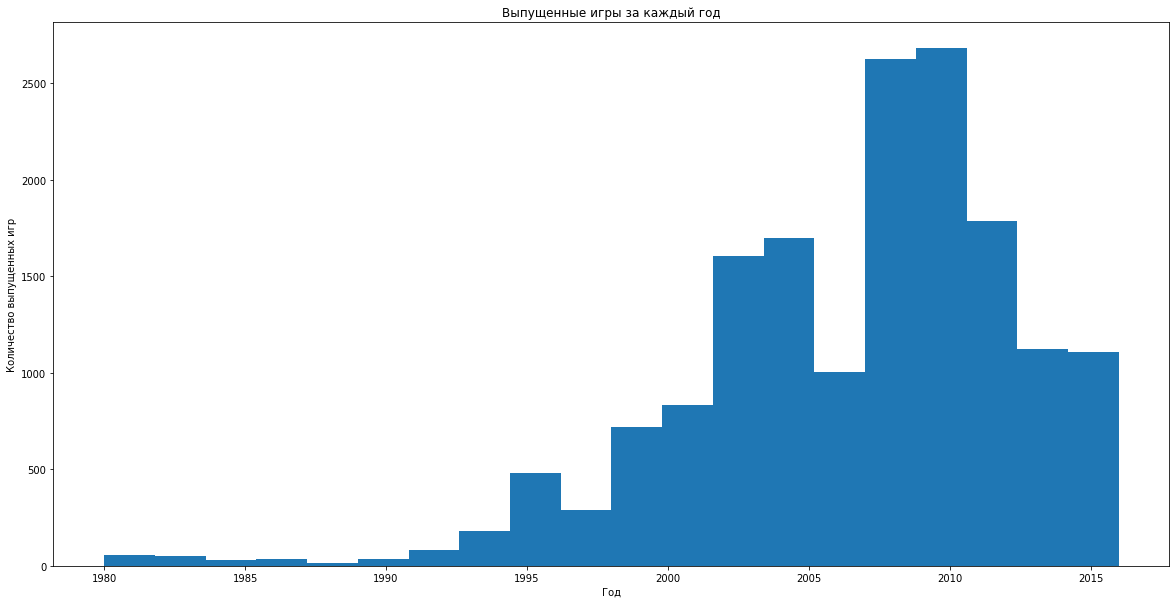

In [84]:
data_games['year_of_release'].plot(kind='hist', bins=20, figsize=(20,10));
plt.xlabel('Год');
plt.ylabel('Количество выпущенных игр');
plt.title('Выпущенные игры за каждый год');

Как видим, игр, выпущенных до 1994 практически нет, поэтому данные до 1994 года не так сильно важны

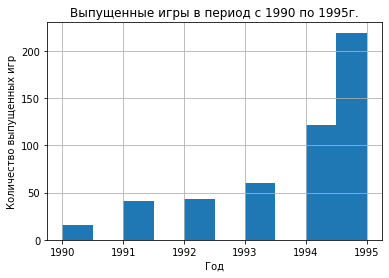

In [18]:
data_games['year_of_release'].hist(bins = 10, range=(1990, 1995));
plt.xlabel('Год');
plt.ylabel('Количество выпущенных игр');
plt.title('Выпущенные игры в период с 1990 по 1995г.');

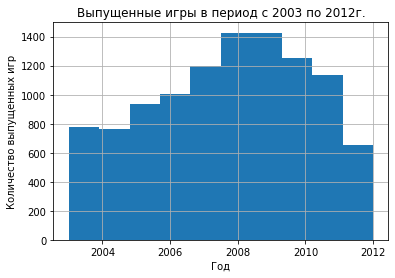

In [19]:
data_games['year_of_release'].hist(bins = 10, range=(2003, 2012));
plt.xlabel('Год');
plt.ylabel('Количество выпущенных игр');
plt.title('Выпущенные игры в период с 2003 по 2012г.');

Пожалуй, самый важный период с 2005 по 2009 год. В этот промежуток времени выпускалось наибольшее количество игр

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
platforms_ascending = data_games.pivot_table(index = ['platform'], values = 'all_region_sales', aggfunc = 'sum')\
                      .sort_values(by = 'all_region_sales', ascending = False)

top10_platforms = platforms_ascending.reset_index()

iloc_top10_platforms = top10_platforms.iloc[0:10]

top10_platforms = iloc_top10_platforms['platform'].unique()

platforms_ascending

,all_region_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


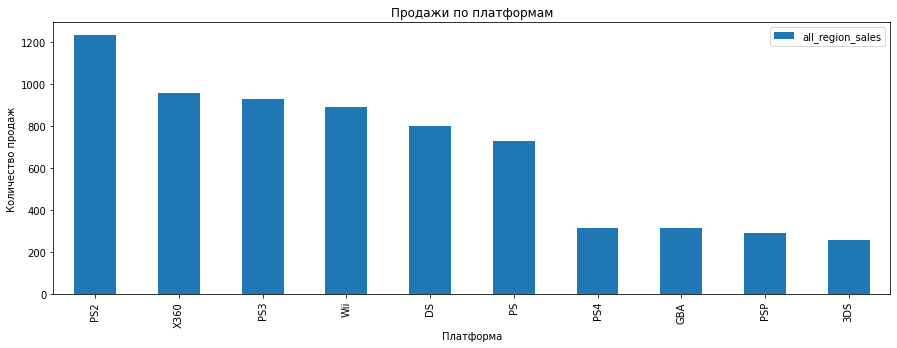

In [21]:
iloc_top10_platforms.plot(x="platform", y="all_region_sales", kind='bar', figsize=(15,5));
plt.xlabel('Платформа');
plt.ylabel('Количество продаж');
plt.title('Продажи по платформам');

Лидер PS2, потом XBOX 360 и опять PS только 3 версии, все видно на графике. Только после 6 места есть приличный провал, где продажи заметно ниже, среди них как и новые выпуски платформ, которые еще наберут популярность и продажи, так и мало известные бренды

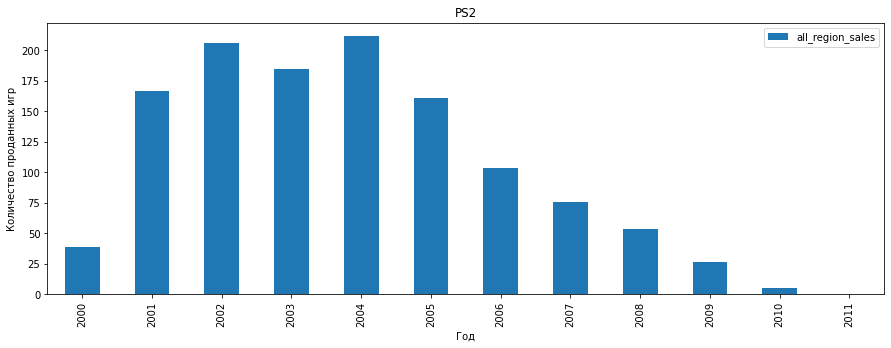

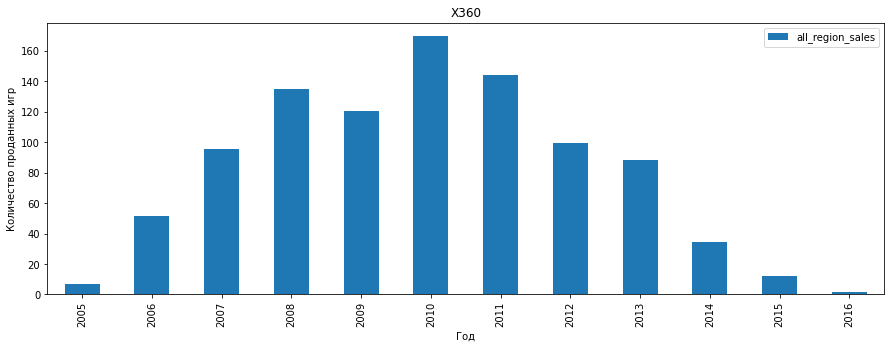

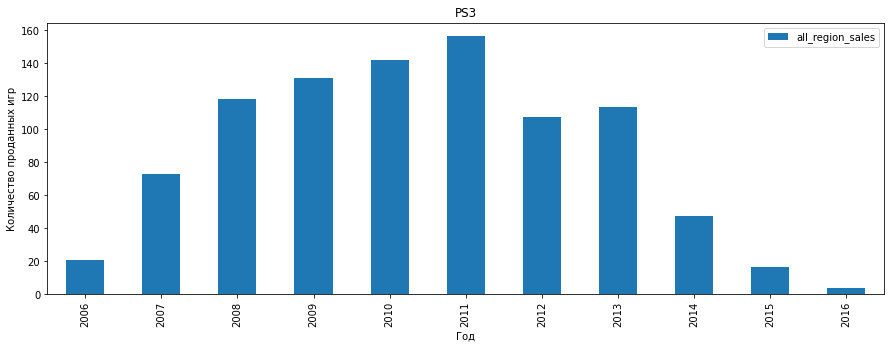

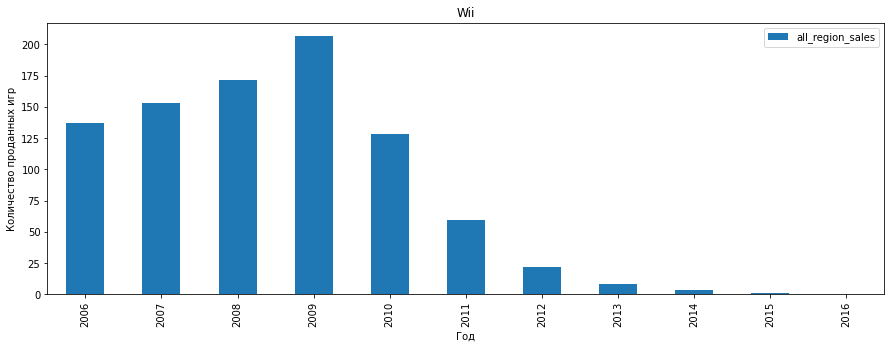

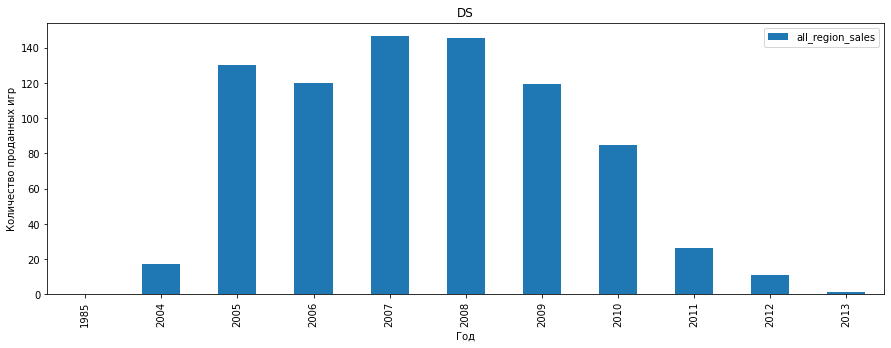

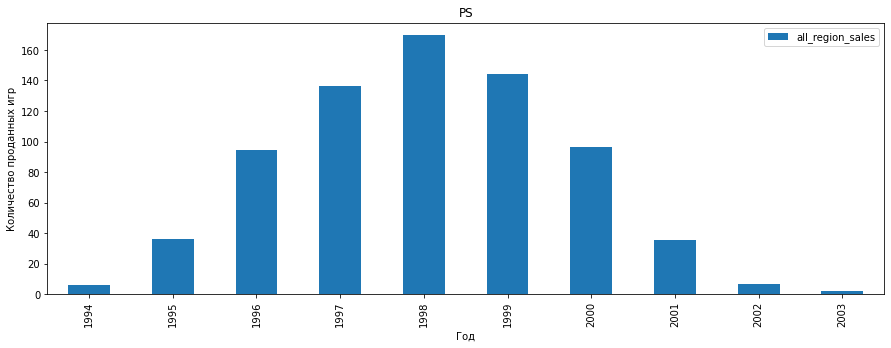

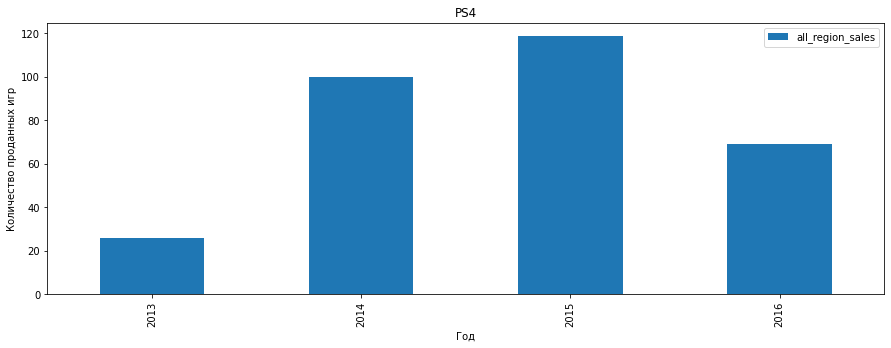

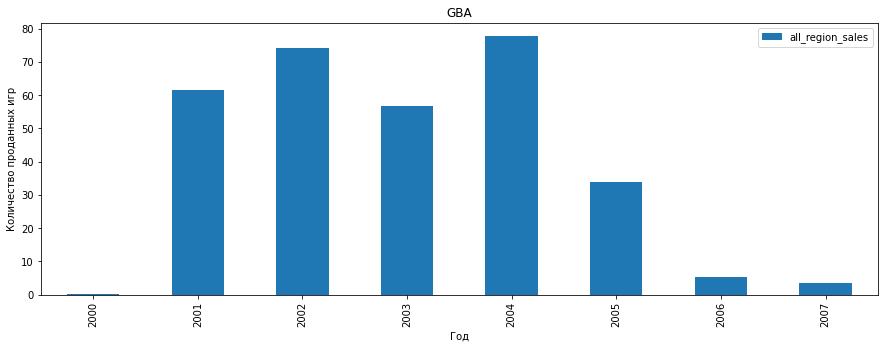

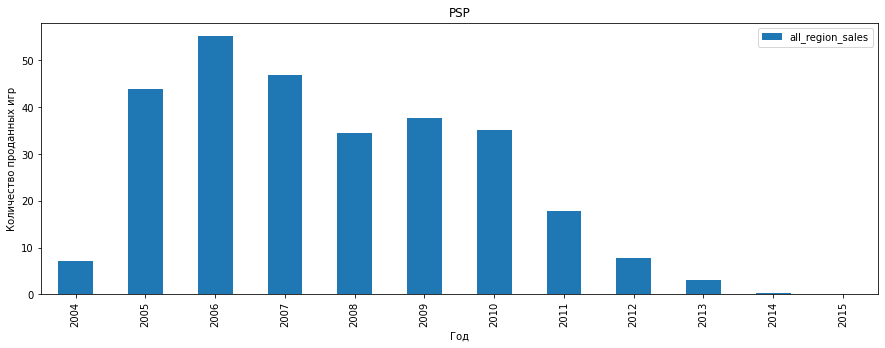

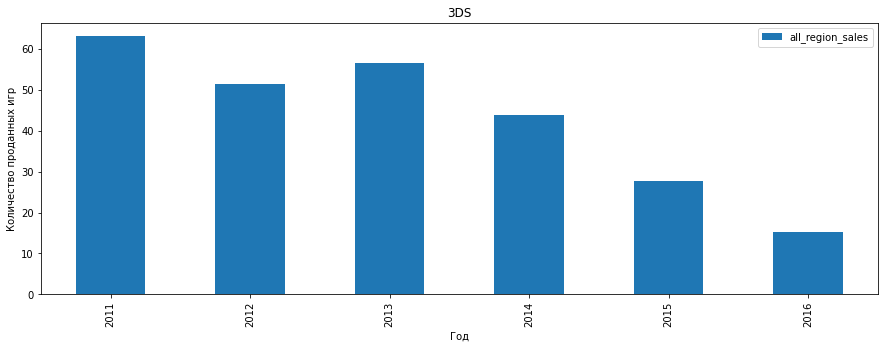

In [22]:
for platform in top10_platforms:
    data_games[data_games['platform'] == platform].pivot_table(index = 'year_of_release', values = 'all_region_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.xlabel('Год');
    plt.ylabel('Количество проданных игр');
    plt.title(platform);

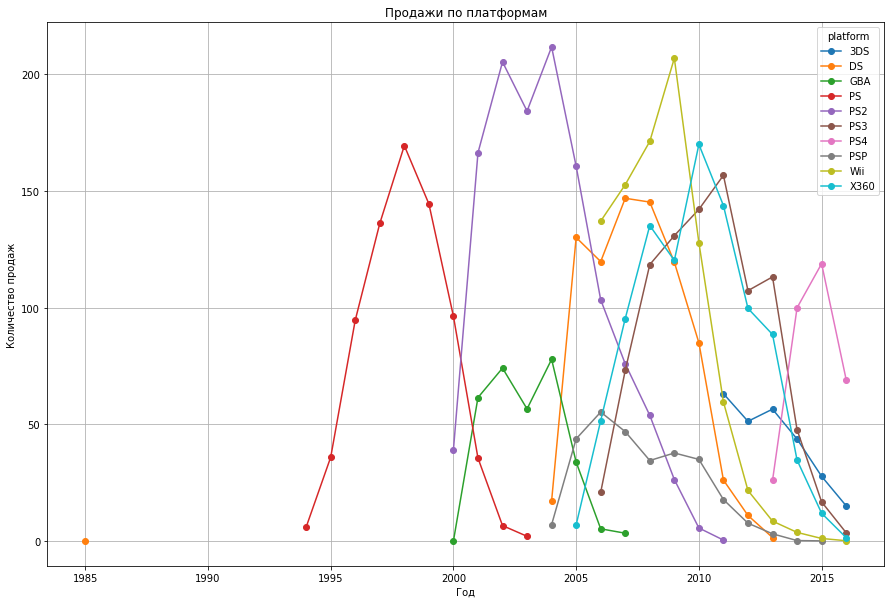

In [23]:
data_games.query('platform in @top10_platforms').pivot_table\
                (index='year_of_release',
                 columns = 'platform',
                 values='all_region_sales',
                 aggfunc='sum')\
                .plot(figsize=(15, 10),marker='o', grid=True)
plt.xlabel('Год');
plt.ylabel('Количество продаж');
plt.title('Продажи по платформам');

Из графиков видно, что среднее время жизни платформы примерно 10 лет, актуальным периодом жизни платформы можно считать период 3-5 лет. Большинство платформ появляется в начале 2000-x, особенно в 2004 - 2006 годах

Для наглядности построим следующий график для платформ с самыми высокими продажами:

In [24]:
top_platforms = platforms_ascending.sort_values(by='all_region_sales', ascending=False).head(6)
top_platforms

,all_region_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


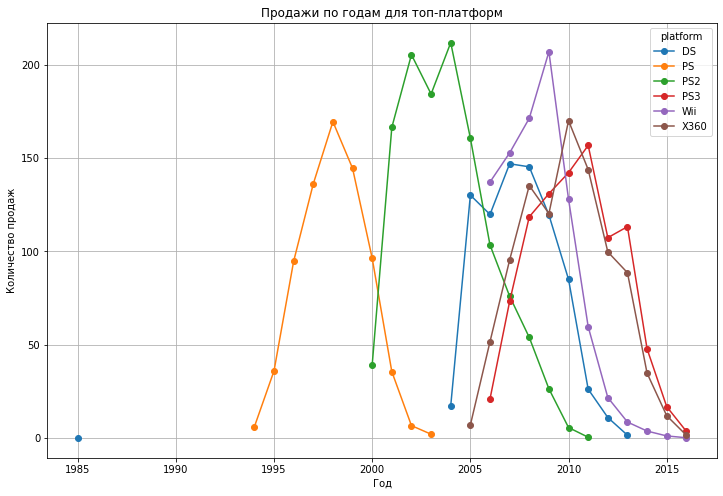

In [25]:
# Список платформ для анализа
platforms = top_platforms.index.tolist()

# Группируем данные по годам и платформам
platform_sales_by_year = data_games[data_games['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['all_region_sales'].sum().unstack()

# Строим график
platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True);
plt.title('Продажи по годам для топ-платформ');
plt.xlabel('Год');
plt.ylabel('Количество продаж');

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

По моему мнению актуальный период: 2012 - 2016.

In [26]:
actual_data = data_games.query('year_of_release >= 2012')

In [27]:
# Создаю сводную таблицу , в которой суммируются продажи по каждой платформе для каждого года релиза игры
actual_platform_sales_by_year = actual_data.groupby(['year_of_release', 'platform'])['all_region_sales'].sum().unstack() 
actual_platform_sales_by_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.14,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


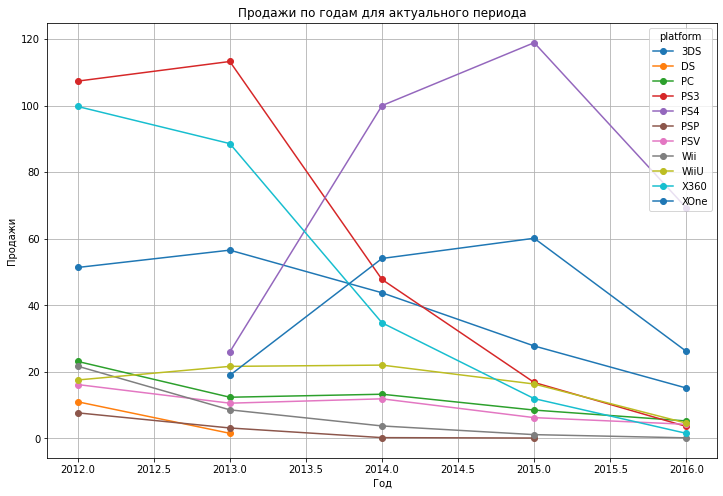

In [28]:
actual_platform_sales_by_year.plot(kind='line', figsize=(12, 8), marker='o', grid=True)
plt.title('Продажи по годам для актуального периода');
plt.xlabel('Год');
plt.ylabel('Продажи');

Все игры на платформах идут на снижение по продажам. Среди них игры на PS4 продаются гораздо чаще, скорее всего, потому что консоль появилась не так давно. PS4 является потенциально прибыльной, также PC, потому что показывает хоть небольшие, но стабильные продажи. падает сильнее всего спрос на консоли: X360, PS3. На остальные консоли уже давно упал спрос, либо вообще не продаются.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

Топ 3 по продажам PS4, XboxOne, 3DS, они и являются потенциально прибыльными, сильнее всего спрос на консоли: X360, PS3

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

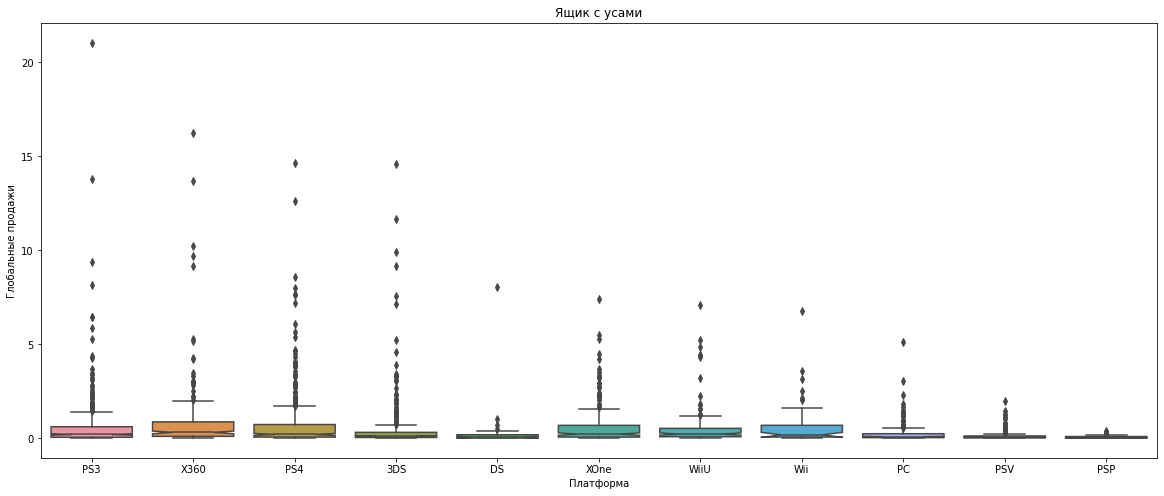

In [29]:
plt.subplots(figsize=(20, 8))
sns.boxplot(data = actual_data, x ='platform', y ='all_region_sales', notch=True);
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

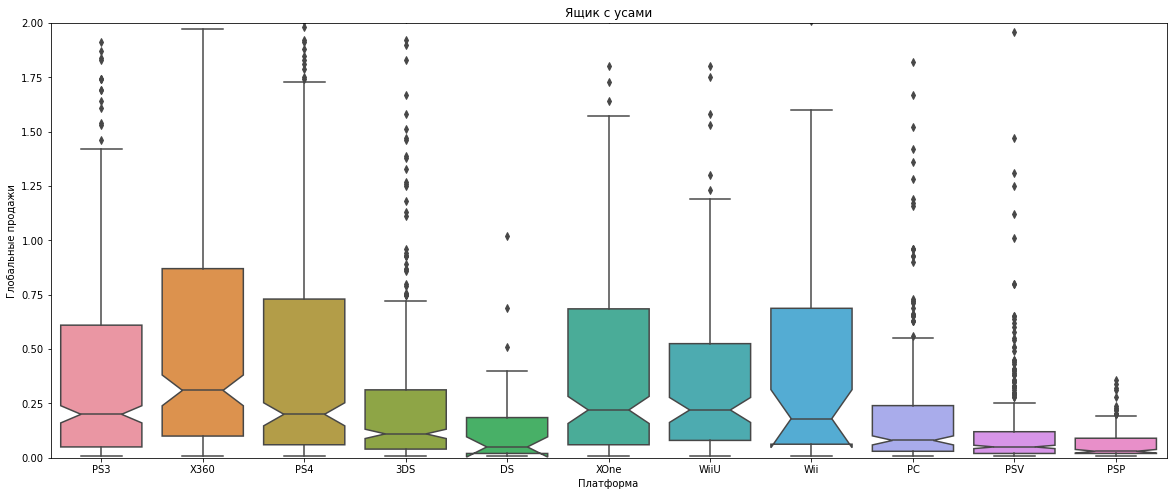

In [30]:
# Сделаем более красивый график:)
plt.subplots(figsize=(20, 8))
sns.boxplot(data = actual_data, x ='platform', y ='all_region_sales', notch=True);
plt.ylim(0, 2)
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

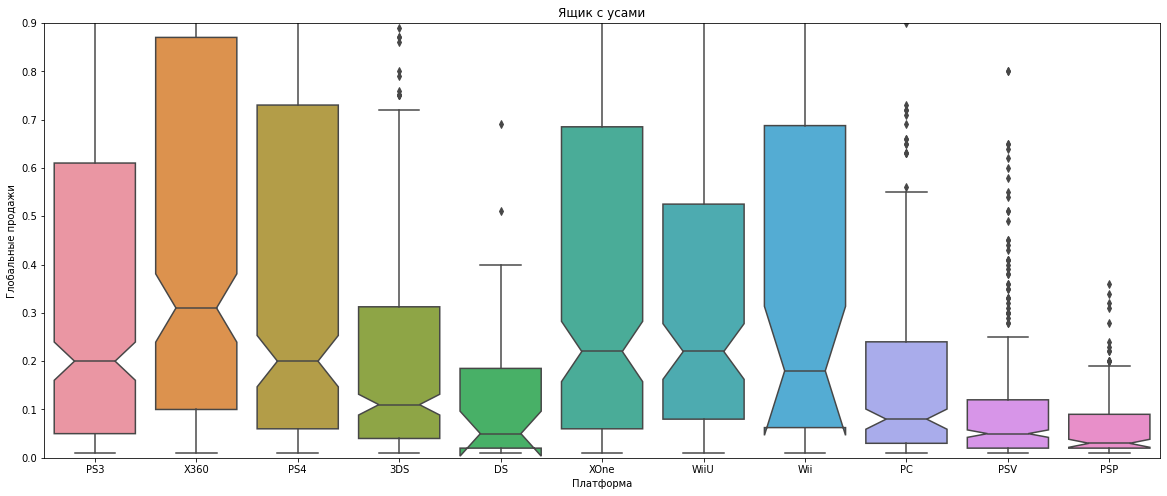

In [31]:
plt.subplots(figsize=(20, 8))
sns.boxplot(data = actual_data, x ='platform', y ='all_region_sales', notch=True);
plt.ylim(0, 0.9)
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

Наиболее успешно игры продаются на XBOX 360, PS4, PS3, XBOXONE.

Заметно, что практически у всех платформ большая часть значений больше медианного.

Я думаю, что выбросы на данном графике - это игры, которые стали очень популярными на той или иной платформе,
чем больше выбросов, тем более вероятно, что платформа может выпустить супер-популярную игру

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

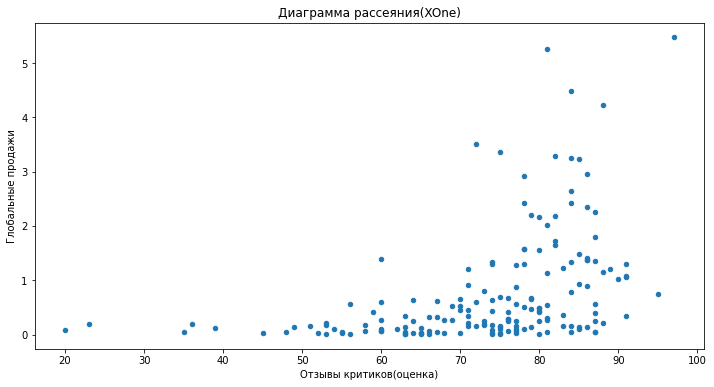

In [32]:
xbox_one = actual_data.query("platform == 'XOne' and critic_score > 0")
xbox_one.plot(kind='scatter', x='critic_score', y='all_region_sales', figsize=(12,6));
plt.title('Диаграмма рассеяния(XOne)');
plt.xlabel('Отзывы критиков(оценка)');
plt.ylabel('Глобальные продажи');

Когда средний рейтинг от критиков возрастает, так же возрастают и средние продажи игр. Чем качественнее игра по мнению критиков, тем больше прибыли она приносит и платформе и издателям.

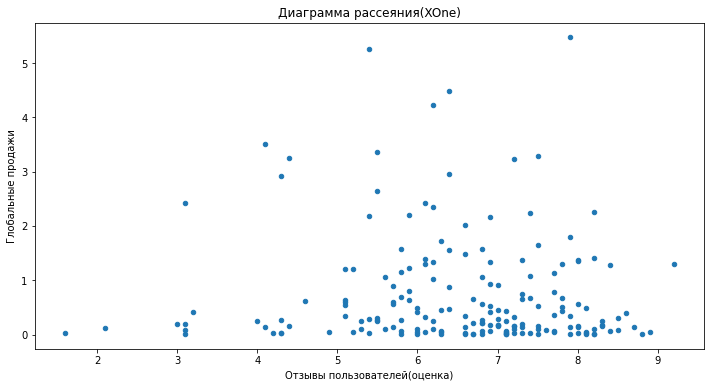

In [33]:
xbox_one = actual_data.query("platform == 'XOne' and user_score > 0")
xbox_one.plot(kind='scatter', x='user_score', y='all_region_sales', figsize=(12,6));
plt.title('Диаграмма рассеяния(XOne)');
plt.xlabel('Отзывы пользователей(оценка)');
plt.ylabel('Глобальные продажи');

История с оценкой пользователями похожа. Но есть и выбросы когда рейтинг пользователей невелик, а игра хорошо продается.

In [34]:
xbox_one_cr = xbox_one[['critic_score','user_score', 'all_region_sales']]
xbox_one_cr.corr()

,critic_score,user_score,all_region_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.068925
all_region_sales,0.410422,-0.068925,1.000000


In [35]:
ps4 = actual_data.query('platform == "PS4"')
pc = actual_data.query('platform == "PC"')

In [36]:
pc_cor = pc[['critic_score','user_score', 'all_region_sales']]
pc_cor.corr()

,critic_score,user_score,all_region_sales
critic_score,1.000000,0.430926,0.238711
user_score,0.430926,1.000000,-0.120079
all_region_sales,0.238711,-0.120079,1.000000


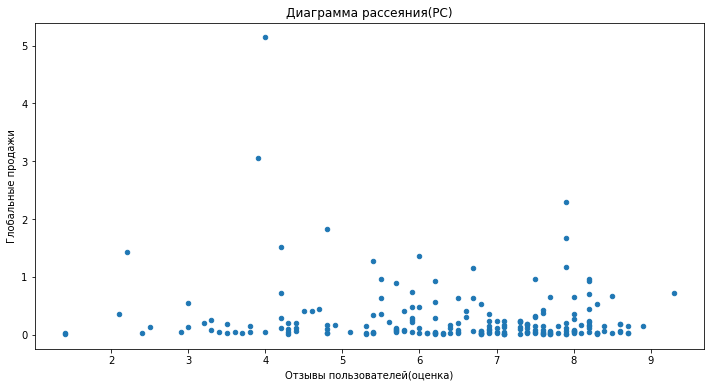

In [37]:
pc.plot(kind='scatter', x='user_score', y='all_region_sales', figsize=(12,6));
plt.title('Диаграмма рассеяния(PC)');
plt.xlabel('Отзывы пользователей(оценка)');
plt.ylabel('Глобальные продажи');

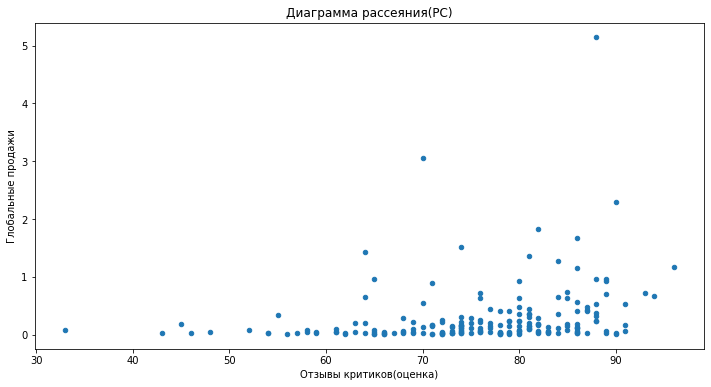

In [38]:
pc.plot(kind='scatter', x='critic_score', y='all_region_sales', figsize=(12,6));
plt.title('Диаграмма рассеяния(PC)');
plt.xlabel('Отзывы критиков(оценка)');
plt.ylabel('Глобальные продажи');

In [39]:
ps4_cor = ps4[['critic_score','user_score', 'all_region_sales']]
ps4_cor.corr()

,critic_score,user_score,all_region_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_region_sales,0.406568,-0.031957,1.000000


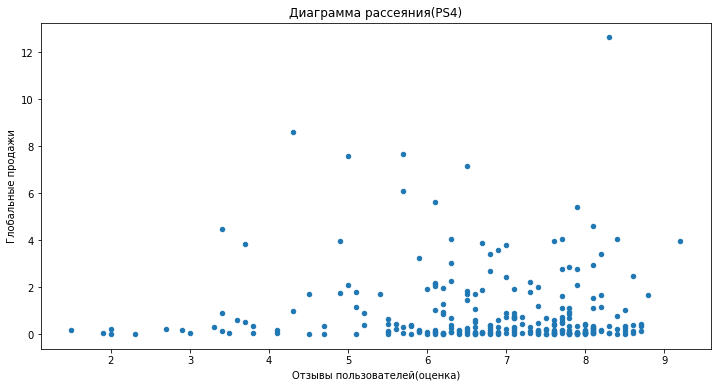

In [40]:
ps4.plot(kind='scatter', x='user_score', y='all_region_sales', figsize=(12,6));
plt.title('Диаграмма рассеяния(PS4)');
plt.xlabel('Отзывы пользователей(оценка)');
plt.ylabel('Глобальные продажи');

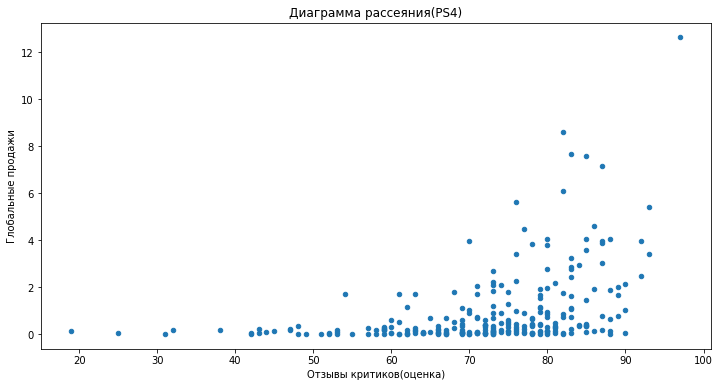

In [41]:
ps4.plot(kind='scatter', x='critic_score', y='all_region_sales', figsize=(12,6));
plt.title('Диаграмма рассеяния(PS4)');
plt.xlabel('Отзывы критиков(оценка)');
plt.ylabel('Глобальные продажи');

Мы видим, что те игры, которым наши эксперты дают высокие оценки - продаются лучше,те они имеют средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

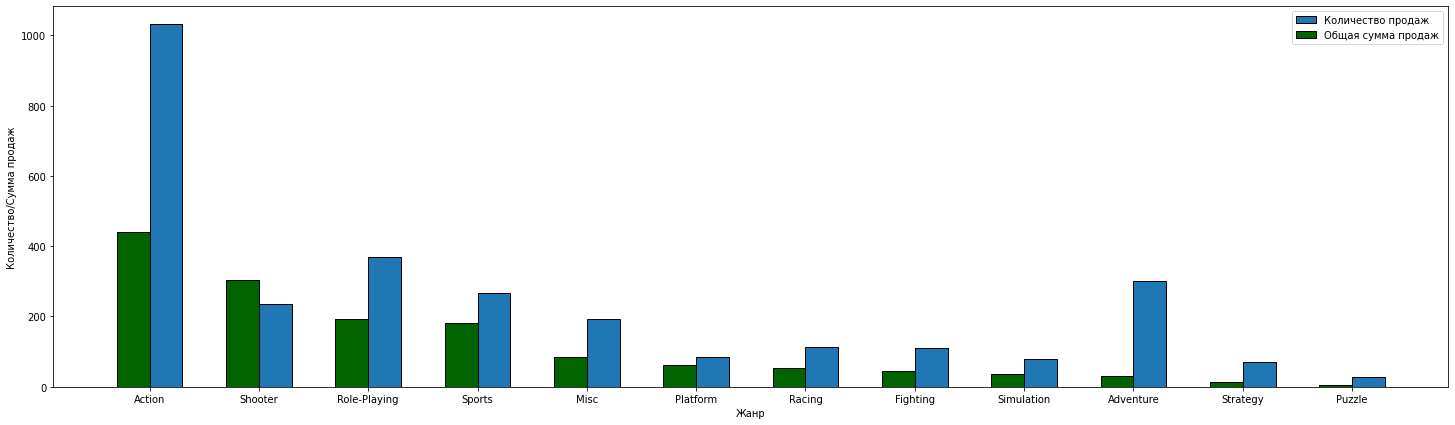

In [77]:
genre_pivot = actual_data.groupby('genre').agg({'name': 'count', 'all_region_sales': 'sum'}).sort_values(by='all_region_sales', ascending=False)

fig, ax = plt.subplots(figsize=(25, 7))
ax.bar(genre_pivot.index, genre_pivot['name'], width=0.3, align='edge', edgecolor='black')
ax.bar(genre_pivot.index, genre_pivot['all_region_sales'], width=-0.3, align='edge', edgecolor='black', color='darkgreen')

ax.set_xlabel('Жанр')
ax.set_ylabel('Количество/Сумма продаж')
ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()

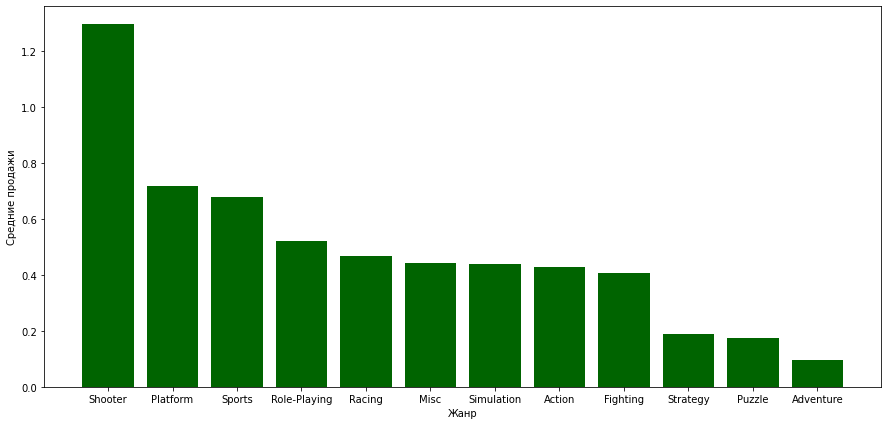

In [78]:
# Посмотрим на средние продажи
genre_pivot = actual_data.groupby('genre').agg({'all_region_sales': 'mean'}).sort_values(by='all_region_sales', ascending=False)

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(genre_pivot.index, genre_pivot['all_region_sales'], color='darkgreen')

ax.set_xlabel('Жанр')
ax.set_ylabel('Средние продажи')
plt.show()


По графику видно, что игры в жанре 'шутер' стабильно приносят высокий доход

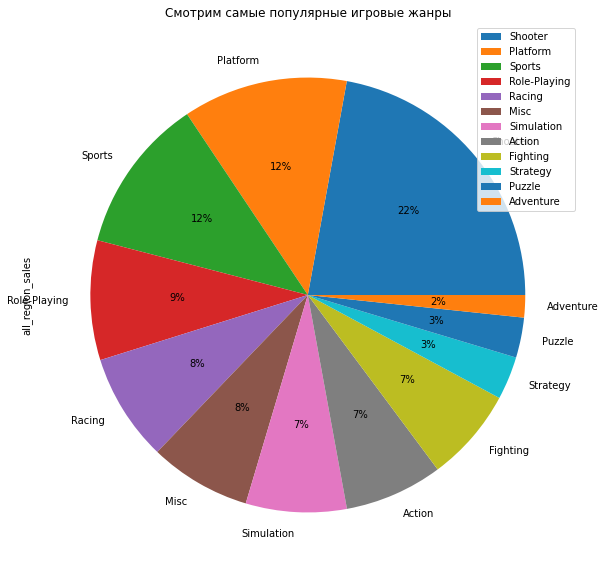

In [43]:
genre_pivot.sort_values(by='all_region_sales', ascending=False).plot\
                       (kind='pie',
                        figsize=(10,10),
                        y='all_region_sales',
                        autopct = '%1.0f%%',
                        title='Смотрим самые популярные игровые жанры');

In [44]:
genre_pivot

,name,all_region_sales
genre,,
Shooter,235,1.296723
Platform,85,0.717647
Sports,267,0.678127
Role-Playing,370,0.521081
Racing,114,0.468596
Misc,192,0.442917
Simulation,80,0.439000
Action,1031,0.427856
Fighting,109,0.408165


Самые прибыльные жанры - Action, Sports, Shooter

Наименее прибыльные жанры - Strategy, Puzzle

Вывод:

Самые популярные игровые платформы за все время: PS, DS, WII, PS3, X360, PS2. Практически все игровые платформы в среднем существуют около 10 лет. Самый пик выхода игр наступает примерно в середине жизни приставки. PC самая долгоживущая платформа. Актуальный период для прогноза на 2017 взяли с 2012 по 2016 год. Данный период выбран в связи с тем, что уже остались только актуальные платформы.

По данным видно, что практически все платформы находятся в стадии снижения показателей. Потенциально прибыльными платформами будем считать: PS4, XONE, 3DS.

Также заметно, что практически у всех платформ большая часть значений больше медианного, также можно сделать о том, что выбросы на ящике с усами - это игры, которые стали очень популярными на той или иной платформе. У платформ XONE, X360, WIIU, WII, PS4 медиана находится в районе значения 0.2. Наиболее длинный ряд успешно продающихся игр у PS4 и XONE, следом WIIU.

Выяснили что оценка критиками имеет роль в продажах(но не на всех платформах одинаково). А вот оценка пользователями практически не влияет на продажи.

Самые прибыльные жанры - Action, Sports, Shooter

Наименее прибыльные жанры - Strategy, Puzzle

## Портрет пользователя каждого региона

Для начала составим портрет пользователя каждого региона.

In [45]:
user_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
user_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
user_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

In [46]:
user_na.head()

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

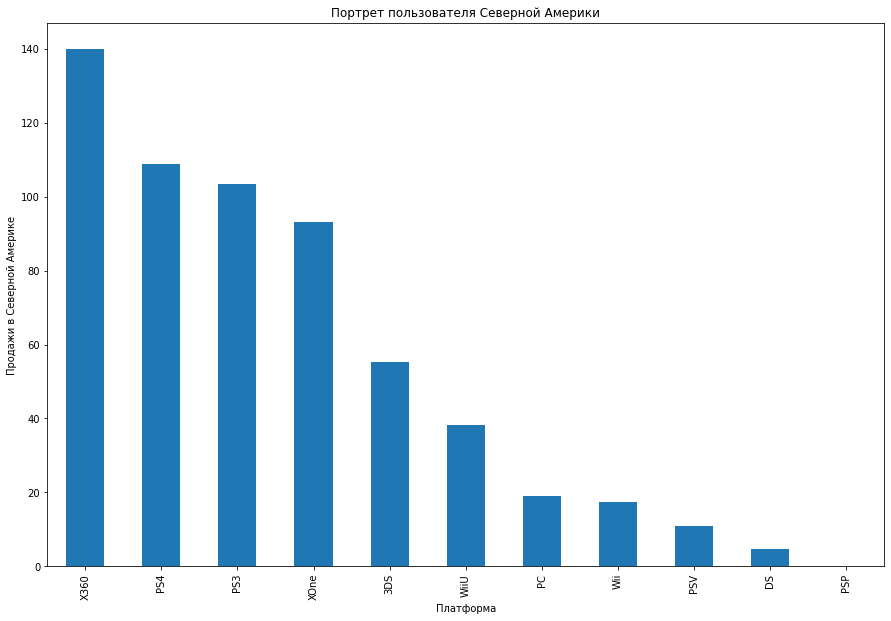

In [47]:
user_na.plot(kind='bar', figsize=(15,10));
plt.title('Портрет пользователя Северной Америки');
plt.xlabel('Платформа');
plt.ylabel('Продажи в Северной Америке');

In [48]:
user_eu.head()

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

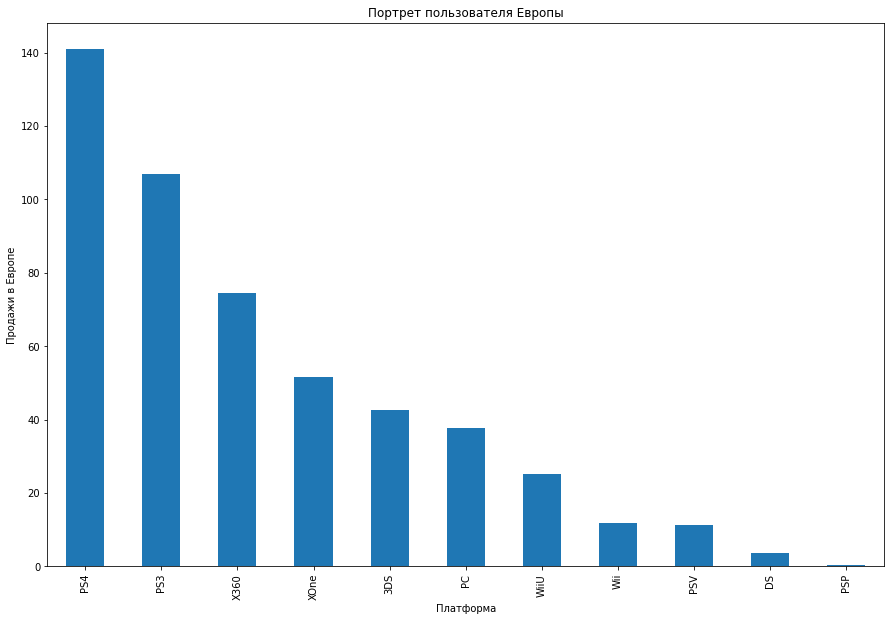

In [49]:
user_eu.plot(kind='bar', figsize=(15,10));
plt.title('Портрет пользователя Европы');
plt.xlabel('Платформа');
plt.ylabel('Продажи в Европе');

In [50]:
user_jp.head()

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

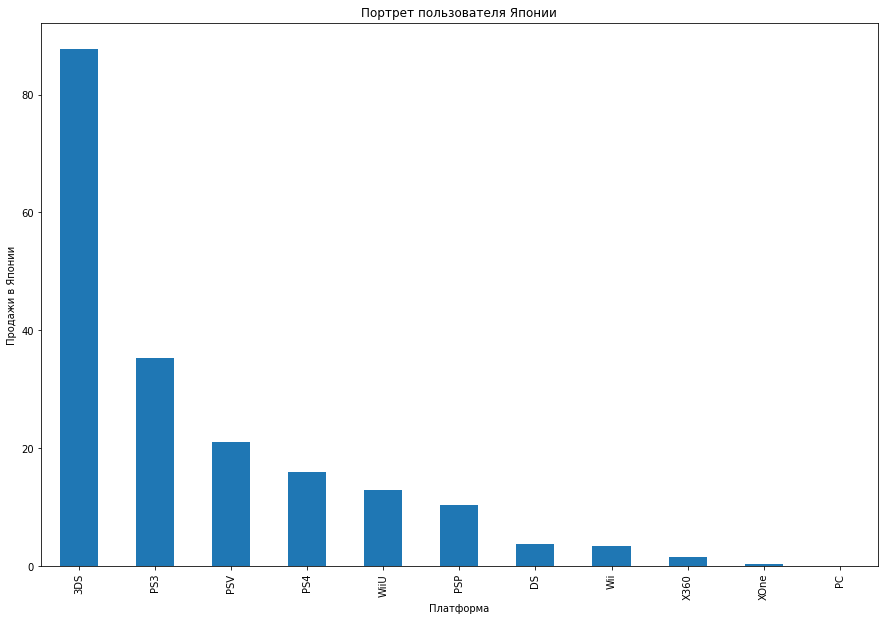

In [51]:
user_jp.plot(kind='bar', figsize=(15,10));
plt.title('Портрет пользователя Японии');
plt.xlabel('Платформа');
plt.ylabel('Продажи в Японии');

Пользователи Северной Америки больше всего предпочитают Xbox и PS, потому что консоли американские, к тому же, самые популярные. Платформы Wii, 3DS - пользуются также определенной популярностью, но они японские.

В Европе же лидируют PS4 и PS3 потом X360, XboxOne и замыкает пятерку тоже 3DS. Европейцы любят PlayStation

В Японии, как обычно, всё наоборот. Лидер - 3DS. За ними PS3 и PSV, PS4. Видно, что в Японии подавляющее большинство пользователей играют в японские платформы

### Самые популярные платформы (топ-5)

In [52]:
top_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
top_na

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [53]:
top_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
top_eu

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [54]:
top_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
top_jp

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [55]:
# Создаем серию, содержащую все остальные платформы
other_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
other_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
other_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()

In [56]:
# Создаем новую серию, объединяя топ 5 и "Другие"
top_na_other = top_na.append(pd.Series(other_na, index=['Other']))
top_eu_other = top_eu.append(pd.Series(other_eu, index=['Other']))
top_jp_other = top_jp.append(pd.Series(other_jp, index=['Other']))

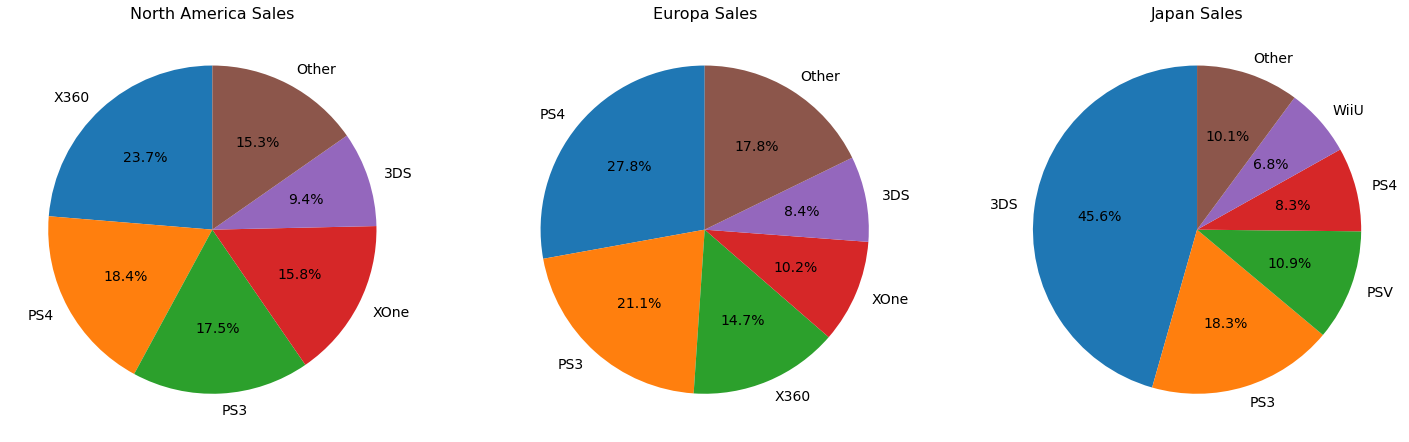

In [57]:
# создаем фигуру с 3 диаграммами
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

# Строим круговые диаграммы для каждого региона
top_na_other.plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, fontsize=14)
top_eu_other.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, fontsize=14)
top_jp_other.plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, fontsize=14)

# Добавляем заголовки к графикам
axs[0].set_title('North America Sales', fontsize=16)
axs[1].set_title('Europa Sales', fontsize=16)
axs[2].set_title('Japan Sales', fontsize=16)

# Убираем подпись None на оси y у всех графиков
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
plt.show()

В Северной Америке самая топовая платформа X360, чуть-чуть отстает PS4, затем PS3, XboxOne и замыкает пятерку 3DS.Америка любит Xbox и PS.

В Европе же лидируют PS4 и PS3 потом X360, XboxOne и замыкает пятерку тоже 3DS. Европейцы любят PlayStation

В Японии, как обычно, всё наоборот. Лидер - 3DS. За ними PS3 и PSV, PS4. Видно, что в Японии подавляющее большинство пользователей(почти 50%) играют в японские платформы

### Самые популярные жанры (топ-5)

In [58]:
na_genre = actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')
na_genre

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [59]:
eu_genre = actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')
eu_genre

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.23
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [60]:
jp_genre = actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')
jp_genre

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


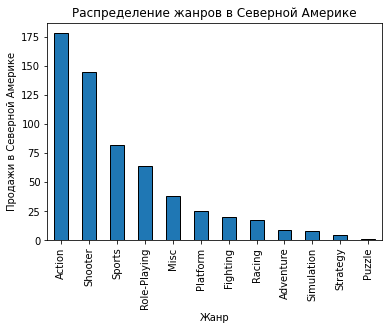

In [61]:
# Строим графики
na_genre.plot(kind='bar', ec='black', legend=False)
plt.title('Распределение жанров в Северной Америке');
plt.xlabel('Жанр');
plt.ylabel('Продажи в Северной Америке');

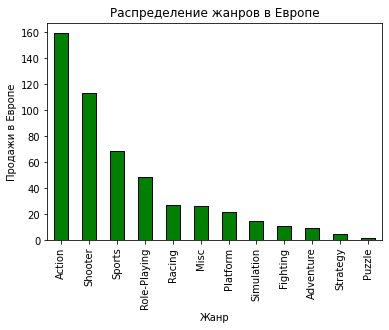

In [62]:
eu_genre.plot(kind='bar', color='green', ec='black', legend=False)
plt.title('Распределение жанров в Европе');
plt.xlabel('Жанр');
plt.ylabel('Продажи в Европе');

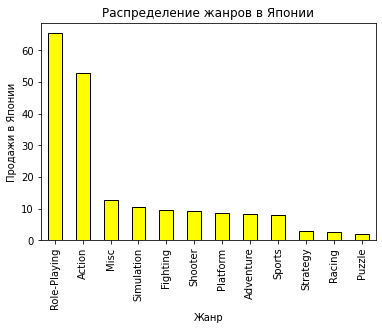

In [63]:
jp_genre.plot(kind='bar', color='yellow', ec='black', legend=False)
plt.title('Распределение жанров в Японии');
plt.xlabel('Жанр');
plt.ylabel('Продажи в Японии');

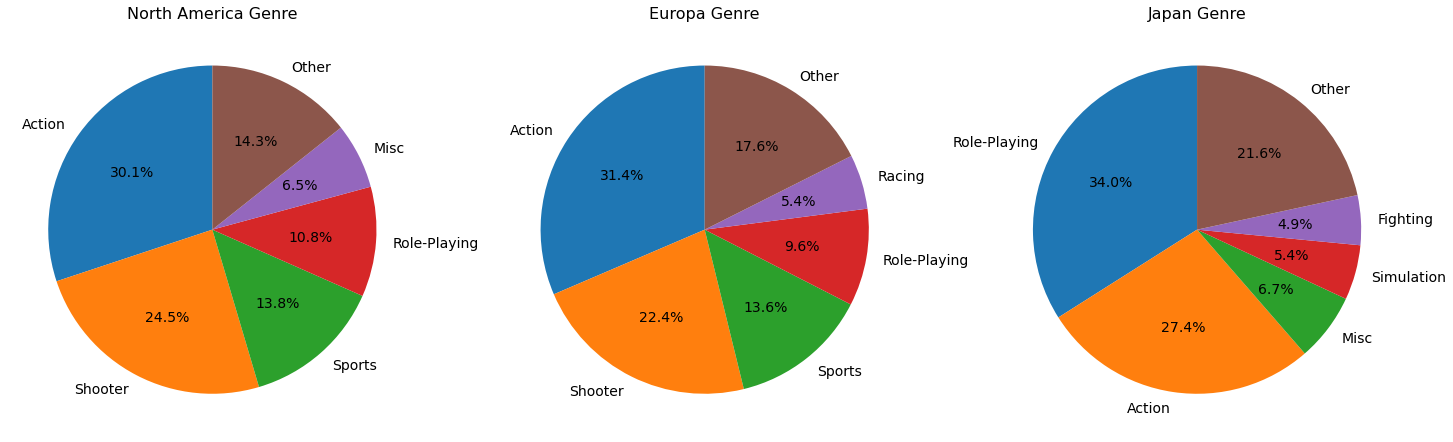

In [64]:
# создаем серию, содержащую только топ 5
na_genre_ = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
eu_genre_ = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
jp_genre_ = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]

# создаем серию, содержащую все остальные платформы
other_na_genre = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
other_eu_genre = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
other_jp_genre = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()

# создаем новую серию, объединяя топ 5 и "Другие"
na_genre_other = na_genre_.append(pd.Series(other_na_genre, index=['Other']))
eu_genre_other = eu_genre_.append(pd.Series(other_eu_genre, index=['Other']))
jp_genre_other = jp_genre_.append(pd.Series(other_jp_genre, index=['Other']))

# создаем фигуру с 3 диаграммами
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

# Строим круговые диаграммы для каждого региона
na_genre_other.plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, fontsize=14)
eu_genre_other.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, fontsize=14)
jp_genre_other.plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, fontsize=14)

# Добавляем заголовки к графикам
axs[0].set_title('North America Genre', fontsize=16)
axs[1].set_title('Europa Genre', fontsize=16)
axs[2].set_title('Japan Genre', fontsize=16)

# Убираем подпись None на оси y у всех графиков
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
plt.show()

Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты экшенов, спортивных игр и шутеров, В Японии же вкус слегка иной - на первом месте ролевые игры, далее экшены, миксы и симуляторы

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [65]:
# Создаем таблицы по регионам
na_rating = actual_data.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
eu_rating = actual_data.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
jp_rating = actual_data.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()

In [66]:
na_rating

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


In [67]:
eu_rating

,eu_sales
rating,
M,193.96
E,113.02
unknown,91.50
E10+,55.37
T,52.90


In [68]:
jp_rating

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


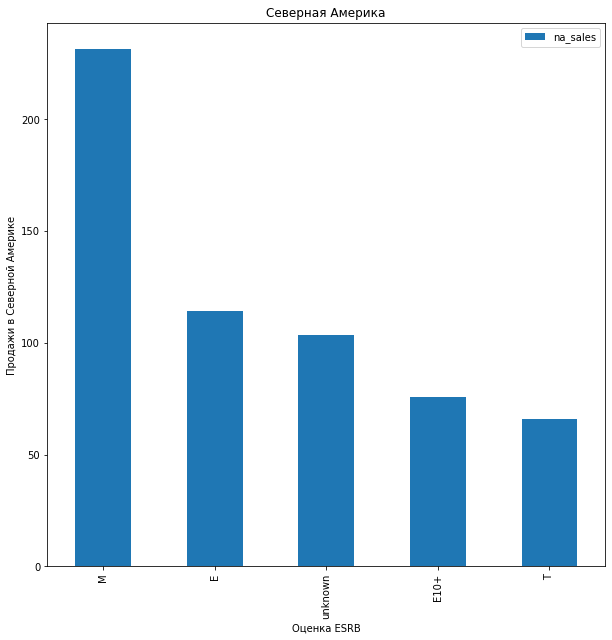

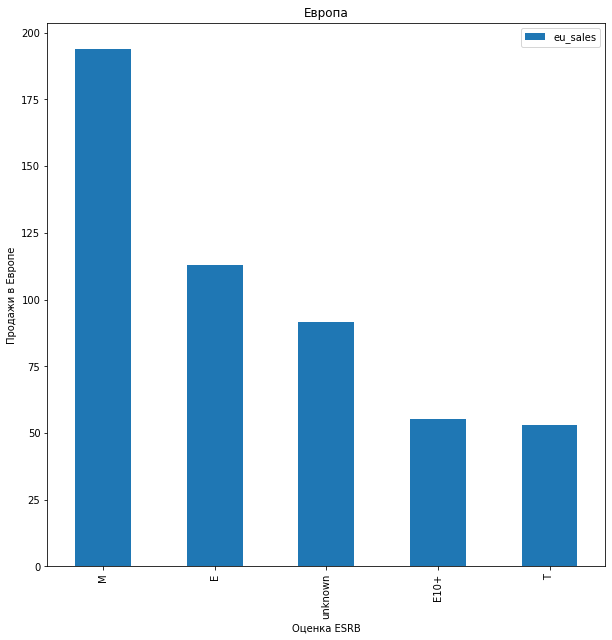

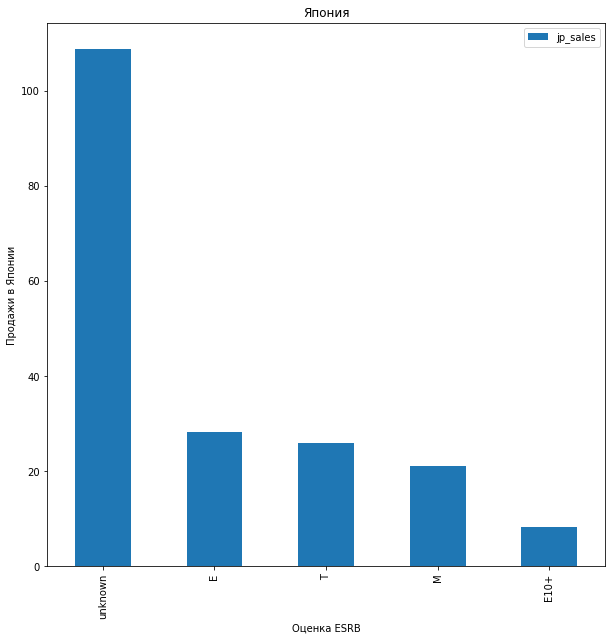

In [69]:
# Построим графики
na_rating.plot(kind='bar', figsize=(10,10))
plt.title('Северная Америка');
plt.xlabel('Оценка ESRB');
plt.ylabel('Продажи в Северной Америке');

eu_rating.plot(kind='bar', figsize=(10,10))
plt.title('Европа');
plt.xlabel('Оценка ESRB');
plt.ylabel('Продажи в Европе');

jp_rating.plot(kind='bar', figsize=(10,10))
plt.title('Япония');
plt.xlabel('Оценка ESRB');
plt.ylabel('Продажи в Японии');

Да, рейтинг влияет на продажи в отдельных регионах. В Северной Америке и Европе преобладают продажи игр с рейтингом E(для всех) и M(для взрослых)

В Японии игры с не определённым рейтингом на первом месте. Но они играют на своих приставках в своих жанрах, вероятно они не присваивают рейтинги ESRB. Возможно у них, какие-то свои рейтинги.

Вывод: Мы выяснили, что портреты пользователей в Еропе и Северной Америке похожи друг на друга, у них преобладают платформы XBOX И PS, в Японии же, напротив, преобладают платформы собственного производства.

То же самое можно сказать и о жанрах: вкусы в Северной Америке и Европе схожи: экшены, спортивные игры и шутеры, В Японии же вкус слегка иной - на первом месте ролевые игры
    
Также выяснили, что рейтинг ESRB влияет на продажи в отдельных регионах 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [70]:
xbox_one = actual_data.query("platform == 'XOne' and user_score > 0")['user_score']
pc = actual_data.query("platform == 'PC' and user_score > 0")['user_score']

In [71]:
results = st.ttest_ind(xbox_one, pc)
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5112133814834332
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, следовательно, они различаются.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [72]:
action_games = actual_data.query('genre == "Action" and user_score > 0')['user_score']
sports_games = actual_data.query('genre == "Sports" and user_score > 0')['user_score']

In [73]:
results = st.ttest_ind(action_games, sports_games)
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Вывод: 

Проверили 2 гипотезы:

    - Рейтинги платформ Xbox One и PC не одинаковые, они различаютсяя
    - Средние пользовательские рейтинги жанров Action и Sports одинаковые

Отвергаем нулевую гипотезу - следовательно, средние пользовательские рейтинги жанров Action и Sports одинаковые

## Общий вывод

Мы провели предобработку данных: привели к нижнему регистру имена столбцов, к правильным типам данных необходимые столбцы. Удалили пропуски в столбцах. Проверили на дубликаты.

Определили, что аббревиатура TBD значит to be determined. Поэтому заменили tbd на nan для проведения дальнейшего анализа.

Проведя анализ, мы выявили, что быстрый рост выпуска игр начинается с 1994. Пик на консольные и компьютерный игры приходится на 2008-2009 года, далее начинается спад.Самые популярные игровые платформы за все время: PS, DS, WII, PS3, X360, PS2. Практически все игровые платформы в среднем существуют около 10 лет. Самый пик выхода игр наступает примерно в середине жизни пплатформы. PC самая долгоживущая платформа. Актуальный период для прогноза на 2017 взяли с 2012 по 2016 года. Данный период выбран в связи с тем, что уже остались только актуальные платформы.

По данным видно, что практически все платформы находятся в стадии снижения показателей. Потенциально прибыльными платформами будем считать: PS4, XONE, 3DS

Оцека критиками и оценка пользователями не одно и тоже. Если оценка критиками имеет влияние на продажи на всех рынках продаж , то пользовательские оценки не влияют

Выяснили, что рынки Америки и Европы схожи , а вот рынок Японии в некотором смысле уникален, со своими рейтингами, жанрами, платформами. И к нему нужны другие подходы.

Рекомендации:

Планируя рекламную кампанию на 2017 год стоит обратить особое внимание на продвижение платформы PS4 , а также платформ XONE , в жанре Sports, Shooter с рекламой в Америке и Европе.С рейтингом ESRB 'Подходит для лиц старше 17 лет' или 'Подходит для всех возрастных категорий'.

Стоит также не забывать об особенностях рынка и подстроить рекламу конкретно под него. На примере Японии показано, как требования потребителей одной страны могут отличаться от предпочтений основной массы пользователей.